# Z3 Python API 入门


## SAT SMT by example (Basics and Equations)

汇报人: 唐瑞泽

日期: 2020年4月23日

[在线观看幻灯片](https://nbviewer.jupyter.org/format/slides/github/hengxin/sat-smt-satisfying/blob/master/seminar/2020-04-23-tang/slides.ipynb#/)

本地Jupyter观看幻灯片需要安装RISE

In [ ]:
!pip3 install RISE

## Z3 介绍

Z3是微软开发的一个跨平台的高性能定理证明器, 用于许多应用程序, 例如: 软件/硬件验证和测试, 约束求解, 混合系统分析, 安全性验证, 生物学和几何问题等. 

Z3提供多种语言的API, 使得调用Z3变得十分方便. 我们使用Python API.

主页: https://github.com/Z3Prover/z3

## SAT和SMT的关系

SMT solver是SAT solver的前端, 它将输入的SMT表达式转换为CNF, 再调用SAT solver.


SMT就像高级编程语言, SAT像汇编语言.

一些SMT solver使用第三方SAT solver作为后端, Z3有自己的SAT solver后端.

### 常见SMT solver

- MathSAT (http://mathsat.fbk.eu/)
- Z3 (https://github.com/Z3Prover/z3/)
- CVC4 (http://cvc4.cs.nyu.edu/web/)
- Yices 2 (http://yices.csl.sri.com/)
- CUDD (http://vlsi.colorado.edu/~fabio/CUDD/)
- PicoSAT (http://fmv.jku.at/picosat/)
- Boolector (http://fmv.jku.at/boolector/)
- PySMT (https://github.com/pysmt/pysmt)
- JavaSMT (https://github.com/sosy-lab/java-smt)
- 作者自己开发的玩具 MK85 (https://yurichev.com/MK85/)

## CNF表达式

举例: $(\lnot A \lor B) \land (C \lor \lnot D)$

SAT solver专用于解CNF形式的布尔表达式

### 常见SAT solver
- CaDiCaL (https://github.com/arminbiere/cadical)
- Glucose (http://www.labri.fr/perso/lsimon/glucose/)
- Lingeling (http://fmv.jku.at/lingeling/)
- MapleCM (http://sat2018.forsyte.tuwien.ac.at/solvers/main_and_glucose_hack/)
- Maplesat (https://sites.google.com/a/gsd.uwaterloo.ca/maplesat/)
- Minicard (https://github.com/liffiton/minicard)
- Minisat (http://minisat.se/MiniSat.html)
- PySAT (https://github.com/pysathq/pysat)

## NP问题的另一种解释

许多算法`快`或`慢`依赖于输入规模.
- 常数时间 $O(1)$
- 线性时间 $O(n)$
- 对数时间 $O(\log(n))$
- 指数时间 $O(2^{p(n)})$

NP问题没有大O表示法.

CNF表达式的求解是NP问题, 可以简单使用暴力枚举的方法. SAT solver实际上也是bruteforce, 但它使用很多优化的方法, 然而没有任何的SAT/SMT solver能预测求解需要的时间.

## SAT/SMT solver到底是什么?
可以理解为解NP问题的API, 因为所有NP都可以规约到SAT问题.

## 资源链接

幻灯片中的资料主要来源:

- [SAT SMT by example (GIT)](https://yurichev.com/SAT_SMT_git/)
- [SAT SMT by example (PDF)](https://yurichev.com/writings/SAT_SMT_by_example.pdf)
- [MK85 toy-level bit-blaster (SRC)](https://yurichev.com/MK85/MK85-20200409.tar.bz2)
- [Z3Py Guide (Jupyter)](https://nbviewer.jupyter.org/github/Z3Prover/z3/blob/master/examples/python/tutorial/jupyter/guide.ipynb)
- [Z3 GitHub](https://github.com/Z3Prover/z3)
- [Z3Examples](https://notebooks.azure.com/nbjorner/projects/z3examples)

# 环境搭建

最新的发布版: <https://github.com/Z3Prover/z3/releases>

使用PyCharm的配置步骤: <https://github.com/hengxin/sat-smt-satisfying/tree/master/z3-config>

或通过Python PIP安装(只包含Python API, 没有Z3可执行程序):

In [ ]:
!pip3 install z3-solver

# 第一件事

`import z3` 或 `from z3 import *`

用多了发现还是 `from z3 import *` 方便

In [6]:
from z3 import *

# 一个简单的例子

$
x > 2\\
y < 10\\
x + 2*y = 7
$

In [7]:
x = Int('x')
y = Int('y')
solve(x > 2, y < 10, x + 2*y == 7)

[y = 0, x = 7]


- `Int('x')`在Z3中创建了整型变量x,
- `solve()`函数可以求解一系列规约是否可满足, 这里有三个规约,
- `<, <=, >, >=, ==, !=`是用于比较的操作符, 类似C++中的重载操作符.

化简函数`simplify()` 和 网页格式化设置`set_option(html_mode=True)`

In [8]:
print(simplify(And(x + 1 >= 3, x**2 + x**2 + y**2 + 2 >= 5)))

And(x >= 2, 2*x**2 + y**2 >= 3)


In [9]:
set_option(html_mode=True)
print(simplify(And(x + 1 >= 3, x**2 + x**2 + y**2 + 2 >= 5)))
set_option(html_mode=False)

x &ge; 2 &and; 2&middot;x<sup>2</sup> + y<sup>2</sup> &ge; 3


上面的html代码显示效果: x &ge; 2 &and; 2&middot;x<sup>2</sup> + y<sup>2</sup> &ge; 3

## 实数
Z3中能表示任意大的整数, 有理数和代数数

In [10]:
x = Real('x')
y = Real('y')
solve(x**2 + 0.12 * y**2 > 3, x**3 + y < 5)

[x = 1/8, y = 639/128]


In [11]:
print(1/3)
print(RealVal(1)/3)
x = Real('x')
print(x + 1/3)
print(x + "1/3")
print(x + 0.25)

0.3333333333333333
1/3
x + 3333333333333333/10000000000000000
x + 1/3
x + 1/4


有理数也可以用十进制小数表示, 最后的<font color='red'>?</font>表示输入被截断到指定的精度:

In [12]:
x = Real('x')
solve(3*x*x == 2)

[x = -0.8164965809?]


In [13]:
set_option(rational_to_decimal=True)
solve(3*x == 1)

set_option(precision=20)
solve(3*x == 1)
set_option(rational_to_decimal=False)
solve(6*x == 37)

[x = 0.3333333333?]
[x = 0.33333333333333333333?]
[x = 37/6]


## 布尔逻辑

Z3支持的布尔逻辑操作: `And()`, `Or()`, `Not()`, `Implies()` (implication), `If()` (if-then-else). `==` (Bi-implications).

举例: $p\Rightarrow q$, $r \Leftrightarrow \lnot q$, $\lnot p \lor r$

In [14]:
p = Bool('p')
q = Bool('q')
r = Bool('r')
solve(Implies(p, q), r == Not(q), Or(Not(p), r))

[p = False, q = True, r = False]


## Solver()

如果规约复杂, `solve()`难以直接使用.

In [15]:
x = Int('x')
y = Int('y')

s = Solver()
print(s)

s.add(x > 10, y == x + 2)
print(s)
print(s.check())
if s.check() == sat:
    print(s.model())

[]
[x > 10, y == x + 2]
sat
[x = 11, y = 13]


Z3无法解非线性多项式时间的规约, 如求解 $2^x=3$ 将会输出`unknown`:

In [16]:
x = Real('x')
s = Solver()
s.add(2**x == 3)
print(s.check())

unknown


约束无法满足时, `solve()`输出`no solution`, `s.check()`输出`unsat`

In [17]:
x = Real('x')
solve(x > 4, x < 0)

no solution


In [18]:
x = Real('x')
s = Solver()
s.add(x > 4, x < 0)
print(s.check())

unsat


## 一次创建多个变量

In [19]:
a, b, c = Ints('a b c')
d, e = Reals('d e')
solve(a > b + 2, a == 2*c + 10, c + b <= 1000, d >= e)

[c = 0, b = 0, e = 0, d = 0, a = 10]


In [20]:
X = [ Int('x%s' % i) for i in range(5) ]
print(X)

X = IntVector('x', 5)
Y = RealVector('y', 5)
P = BoolVector('p', 5)
print(X, Y, P, sep='\n')

[x0, x1, x2, x3, x4]
[x__0, x__1, x__2, x__3, x__4]
[y__0, y__1, y__2, y__3, y__4]
[p__0, p__1, p__2, p__3, p__4]


## 机器数表示

In [21]:
x, y = BitVec('x', 16), BitVec('y', 16)
print(x + 2)

# -1 is equal to 65535 for 16-bit integers 
print(simplify(x + y - 1))

# Creating bit-vector constants
a, b = BitVecVal(-1, 16), BitVecVal(65535, 16)
print(simplify(a == b))

a, b = BitVecVal(-1, 32), BitVecVal(65535, 32)
# -1 is not equal to 65535 for 32-bit integers 
print(simplify(a == b))

x + 2
65535 + x + y
True
False


Z3并不区分有符号或无符号, 对于无符号的操作, 有特定的操作符:`ULT, ULE, UGT, UGE, UDiv, URem and LShR`对应`<, <=, >, >=, /, % and >>`

In [22]:
solve(x & y == ~y)

solve(x < 0)

# using unsigned version of < 
solve(ULT(x, 0))

[y = 65535, x = 0]
[x = 65535]
no solution


# 为什么使用 Z3 Python API?


接下来将对比使用Python和直接使用Z3解下面的三元一次方程组:

$ 3x + 2y − z = 1 \\
2x − 2y + 4z = −2 \\
−x + \frac{1}{2}y − z = 0 $

使用Z3 Python API:

In [23]:
x, y, z = Reals('x y z')
s = Solver()
s.add(3 * x + 2 * y - z == 1)
s.add(2 * x - 2 * y + 4 * z == -2)
s.add(-x + 0.5 * y - z == 0)
print(s.check())
print(s.model())

sat
[z = -2, y = -2, x = 1]


直接使用Z3命令行工具(需要`z3`所在目录在`PATH`中):

In [24]:
!echo \
(declare-const x Real) \
(declare-const y Real) \
(declare-const z Real) \
(assert (=(-(+(* 3 x) (* 2 y)) z) 1)) \
(assert (=(+(-(* 2 x) (* 2 y)) (* 4 z)) -2)) \
(assert (=(-(+ (- 0 x) (* 0.5 y)) z) 0)) \
(check-sat) \
(get-model) | z3 -in

sat
(model 
  (define-fun z () Real
    (- 2.0))
  (define-fun y () Real
    (- 2.0))
  (define-fun x () Real
    1.0)
)


### 另一个解方程的例子
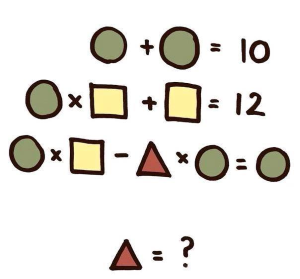

In [25]:
circle, square, triangle = Ints('circle square triangle')
s = Solver()
s.add(circle + circle == 10)
s.add(circle * square + square == 12)
s.add(circle * square - triangle * circle == circle)
print(s.check())
if s.check() == sat:
    print(s.model())

sat
[triangle = 1, square = 2, circle = 5]


### 直接使用SAT的例子

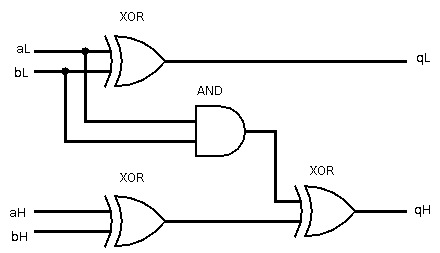

上图中的2-bit 加法器电路没有进位, 求使得输出为3(qL和qH均为1)的输入

容易想到有四种可能的输入: $0 + 3 = 3$, $1 + 2 = 3$, $2 + 1 = 3$, $3 + 0 = 3$

将该问题改写为CNF: $(\lnot a \lor \lnot c)\land(a \lor c)\land(\lnot b \lor \lnot d)\land(b \lor d)$

使用MiniSat解该问题:
```
p cnf 4 4
-1 -3 0
1 3 0
-2 -4 0
2 4 0
```
输出:
```
SAT
-1 -2 3 4 0
```

SAT与SMT相比, 就像汇编语言与C语言.

# 更多示例 (第三章 Equations)


### 解XKCD 287 <https://www.xkcd.com/287/>

In [26]:
%%html
<iframe src="https://xkcd.com/287/" width=900 height=520></iframe>

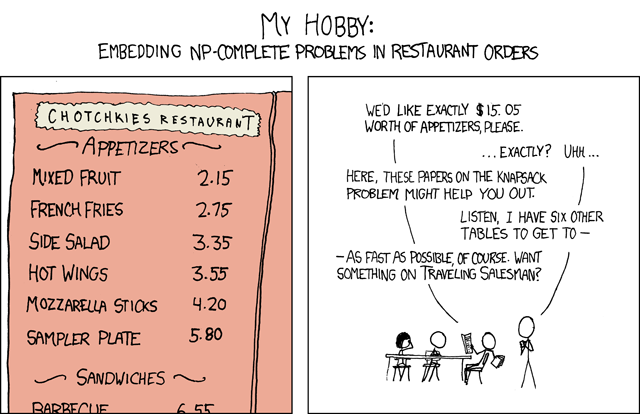


等价于 $2.15a + 2.75b + 3.35c + 3.55d + 4.20e + 5.80f == 15.05$, 其中$a\dots f$是整数.

这是一个丢番图方程(Diophantine Equation, 又称不定方程, 整系数多项式方程).

下面使用Z3进行求解(原文中使用了他自己开发的MK85):

In [27]:
var = [BitVec(chr(i+ord('a')), 16) for i in range(6)]

s = Solver()
for i in var:
    s.add(ULE(i, 10))
s.add(var[0] * 215 + var[1] * 275 + var[2] * 335 + var[3] * 355 + var[4] * 420 + var[5] * 580 == 1505)

while s.check() == sat:
    m = s.model()
    print(m)
    # block current solution and solve again:
    fmt = And(*[i == m.evaluate(i) for i in var])
    s.add(Not(fmt))

[f = 1, b = 0, a = 1, c = 0, d = 2, e = 0]
[f = 0, b = 0, a = 7, c = 0, d = 0, e = 0]


XKCD 287的其他解法(各种奇奇怪怪的语言): <https://stackoverflow.com/questions/141779/solving-the-np-complete-problem-in-xkcd>

## 优化问题: Wood workshop
有很多大小为6x13的木块, 需加工为800个4x5的小木块和400个2x3的小木块.

有四种加工方式:
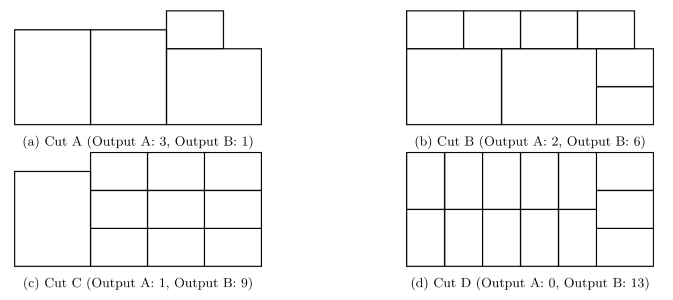

怎样切使用最少的木块?

In [28]:
s = Optimize()
workpieces_total = Int('workpieces_total')
cut_A, cut_B, cut_C, cut_D = Ints('cut_A cut_B cut_C cut_D')
out_A, out_B = Ints('out_A out_B')
s.add(workpieces_total == cut_A + cut_B + cut_C + cut_D)
s.add(cut_A >= 0)
s.add(cut_B >= 0)
s.add(cut_C >= 0)
s.add(cut_D >= 0)
s.add(out_A == cut_A * 3 + cut_B * 2 + cut_C * 1)
s.add(out_B == cut_A * 1 + cut_B * 6 + cut_C * 9 + cut_D * 13)
s.add(out_A == 800)
s.add(out_B == 400)
s.minimize(workpieces_total)
print(s.check(), s.model())

sat [cut_B = 25,
 cut_D = 0,
 cut_A = 250,
 out_B = 400,
 out_A = 800,
 workpieces_total = 275,
 cut_C = 0]


### 子集和问题(Subset sum)
给一个整数集合，问是否存在某个非空子集，使得子集内中的数字和为某个特定数值。

例：给定集合{−7, −3, −2, 5, 8}，是否存在子集和为0的集合?答案是YES，因为子集{−3, −2, 5}的数字和是0。

In [29]:
set = [-7, -3, -2, 5, 8]
var = [Int('var_%d' % i) for i in range(len(set))]
s = Solver()
rt = []
for i, j in zip(var, set):
    rt.append(i * j)
    s.add(Or(i == 0, i == 1))  # like bools
s.add(sum(rt) == 0)
s.add(sum(var) >= 1)  # subset must not be empty
if s.check() == sat:
    m = s.model()
    print([j for i, j in zip(var, set) if m[i].as_long() == 1])
else:
    print("unsat")

[-3, -2, 5]


### 2017 AMC 12A Problems/Problem 2

The sum of two nonzero real numbers is 4 times their product. What is the sum of the reciprocals of the two numbers?

In [31]:
%%html
<iframe src="https://artofproblemsolving.com/wiki/index.php?title=2017_AMC_12A_Problems/Problem_2" width=840 height=400></iframe>

In [32]:
x, y = Reals('x y')
s = Solver()
s.add(x > 0)
s.add(y > 0)
s.add(x + y == 4 * x * y)
print(s.check())
m = s.model()
print("the model: ", m)
print("the answer:", m.evaluate(1 / x + 1 / y))

sat
the model:  [x = 1, y = 1/3]
the answer: 4


### 模逆元
给定一个机器数(能被3整除), 它乘以什么数的结果就像它除以3一样?

In [33]:
m = BitVec('m', 32)
s = Solver()
divisor = 3  # wouldn't work for 10, etc
random_const = 0x1234567  # random constant, must be divisible by divisor
const = (random_const * divisor)
s.add(const * m == const / divisor)
print(s.check())
magic_number = s.model()[m].as_long()
print("0x%x" % magic_number)

sat
0xaaaaaaab


In [34]:
print('验证: 0x%x' % (const * magic_number & 0xffffffff))

验证: 0x1234567


### 扫雷游戏
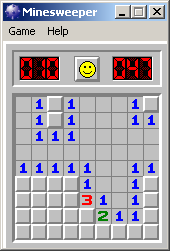

In [35]:
known = [
    "01?10001?",
    "01?100011",
    "011100000",
    "000000000",
    "111110011",
    "????1001?",
    "????3101?",
    "?????211?",
    "?????????"]

WIDTH = len(known[0])
HEIGHT = len(known)

print("WIDTH=", WIDTH, "HEIGHT=", HEIGHT)

WIDTH= 9 HEIGHT= 9


In [36]:
def chk_bomb(row, col):
    s = Solver()
    cells = [[Int('r%d_c%d' % (r, c)) for c in range(WIDTH + 2)] for r in range(HEIGHT + 2)]
    for c in range(WIDTH + 2):  # make border
        s.add(cells[0][c] == 0)
        s.add(cells[HEIGHT + 1][c] == 0)
    for r in range(HEIGHT + 2):
        s.add(cells[r][0] == 0)
        s.add(cells[r][WIDTH + 1] == 0)
    for r in range(1, HEIGHT + 1):
        for c in range(1, WIDTH + 1):
            s.add(Or(cells[r][c] == 0, cells[r][c] == 1))  # otherwise -1 is possible, etc
            t = known[r - 1][c - 1]
            if t in "012345678":
                s.add(cells[r][c] == 0)
                # we need empty border so the following expression would be able to work for all possible cases:
                expr = cells[r - 1][c - 1] + cells[r - 1][c] + cells[r - 1][c + 1] + cells[r][c - 1] + \
                       cells[r][c + 1] + cells[r + 1][c - 1] + cells[r + 1][c] + cells[r + 1][c + 1] == int(t)
                s.add(expr)
    s.add(cells[row][col] == 1)  # place bomb

    if s.check() == unsat:
        print("row=%d col=%d, unsat!" % (row, col))

In [37]:
# enumerate all hidden cells:
for r in range(1, HEIGHT + 1):
    for c in range(1, WIDTH + 1):
        if known[r - 1][c - 1] == "?":
            chk_bomb(r, c)

row=1 col=3, unsat!
row=6 col=2, unsat!
row=6 col=3, unsat!
row=7 col=4, unsat!
row=7 col=9, unsat!
row=8 col=9, unsat!


输出unsat的坐标是没有地雷的, 在游戏中点击后将结果再传给Z3求解
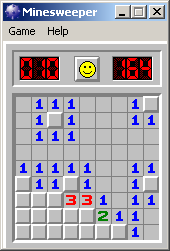

### 破解线性同余伪随机数生成器(LCG)

LCG非常高效, 使用广泛, 如C语言的`rand()`函数. 

LCG定义: $X_{n+1}=(aX_n+c)\mod m$

但它的安全性非常低, 我们使用Z3来破解LCG.

In [46]:
%%html
<iframe src="https://en.wikipedia.org/wiki/Linear_congruential_generator" width=800 height=520></iframe>

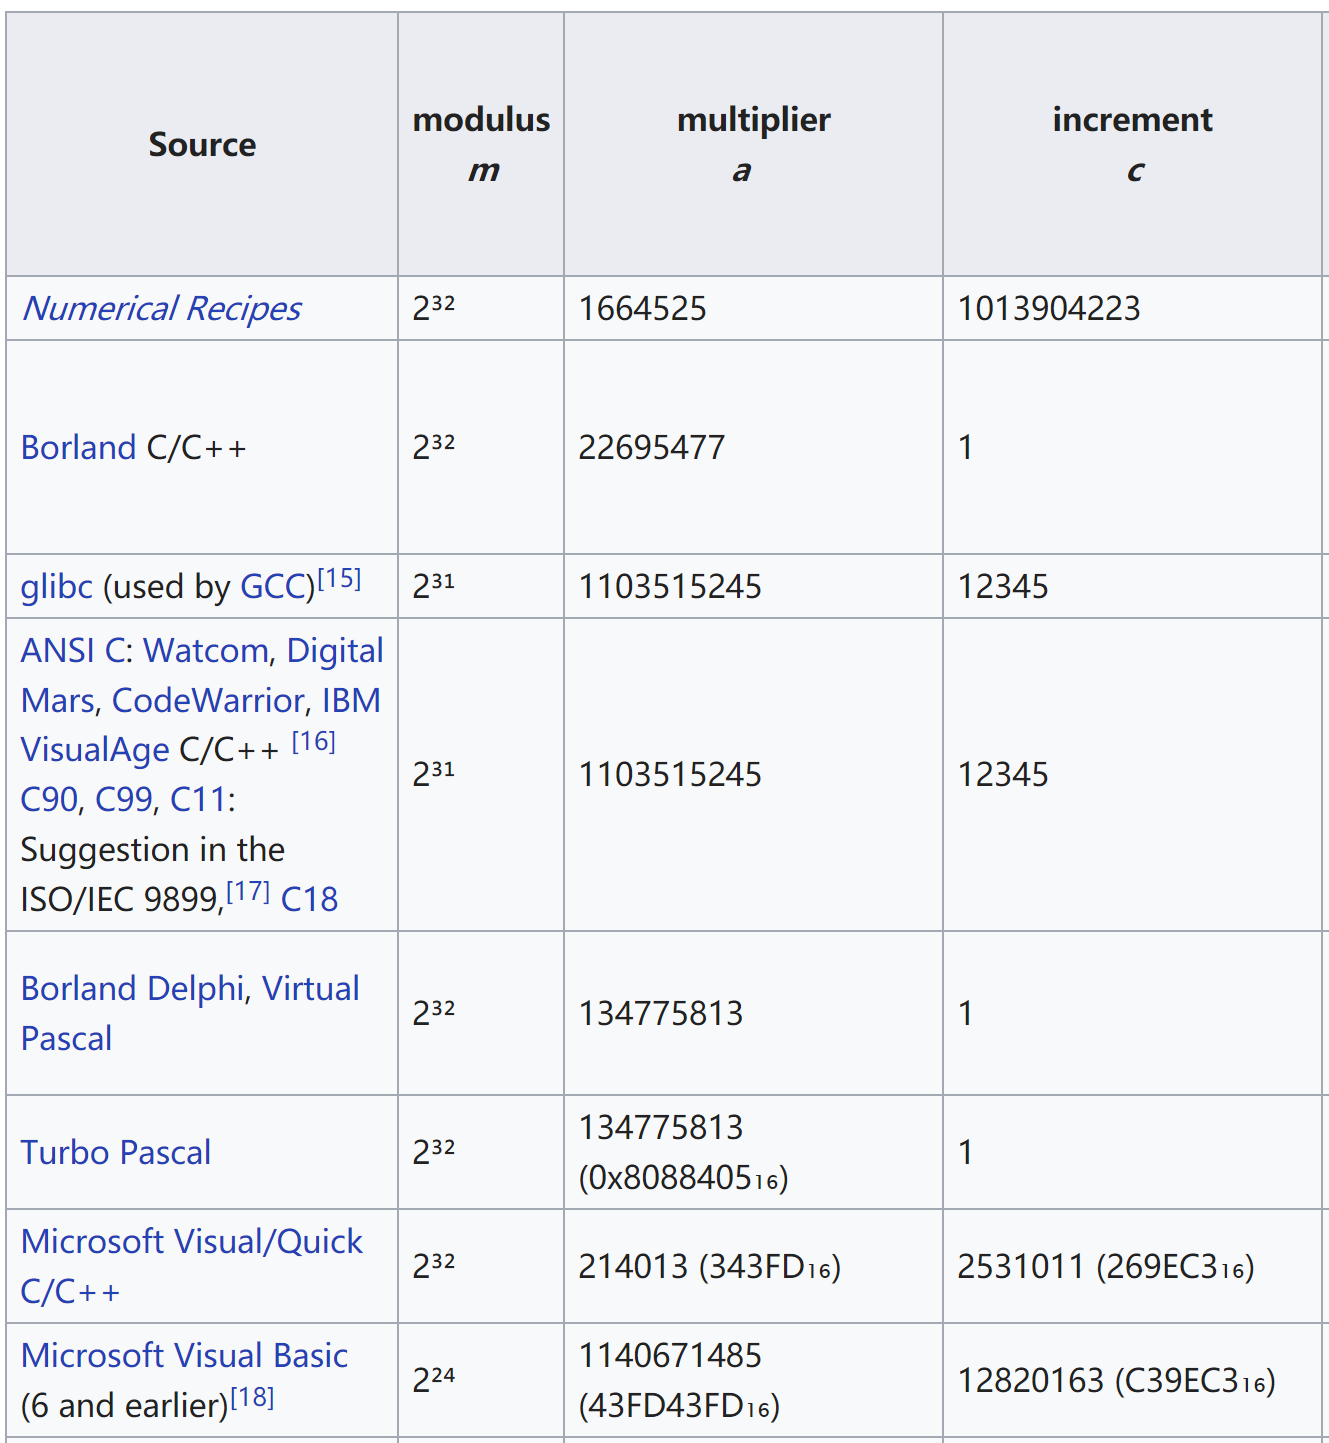

In [39]:
import time

modulus = 2 ** 31
a = 1103515245
c = 12345

def lcg(seed):
    """Linear congruential generator."""
    while True:
        seed = (a * seed + c) % modulus
        yield (seed >> 16) & 0x7fff  # 提高破解效率

generator = lcg(int(time.time()))
rand_var = []
rand_state = []

for g, _ in zip(generator, range(10)):
    rand_var.append(g % 100)
    rand_state.append(g)
print('random var:', rand_var)
print('random state:', rand_state)

random var: [97, 17, 49, 55, 8, 42, 14, 58, 68, 28]
random state: [19497, 8317, 27149, 20155, 21308, 15142, 29814, 22358, 30868, 15328]


In [40]:
state = [BitVec('state%d' % i, 32) for i in range(10)]

output_prev = BitVec('output_prev', 32)
output_next = BitVec('output_next', 32)

s = Solver()
for i in range(9):
    s.add(state[i + 1] == ((state[i] * a + c) % modulus))

for i in range(1, 9):
    s.add(URem((state[i] >> 16) & 0x7fff, 100) == rand_var[i])
s.add(output_prev == URem((state[0] >> 16) & 0x7fff, 100))
s.add(output_next == URem((state[9] >> 16) & 0x7fff, 100))

if s.check() == sat:
    m = s.model()
    print('cracked state', [m.evaluate((state[i] >> 16) & 0x7fff) for i in range(10)])
    print('predicate first:', m.evaluate(output_prev), 'last:', m.evaluate(output_next))
else:
    print('unsat')

cracked state [19497, 8317, 27149, 20155, 21308, 15142, 29814, 22358, 30868, 15328]
predicate first: 97 last: 28


这个LCG能产生4个连续的0吗? (运行较慢)

In [41]:
s = Solver()
for i in range(4):
    s.add(state[i + 1] == ((state[i] * a + c) % modulus))

for i in range(1, 5):
    s.add(URem((state[i] >> 16) & 0x7fff, 100) == 0)

print(s.check())
if s.check() == sat:
    print(s.model())

sat
[state3 = 3228838068,
 state1 = 2789793222,
 state2 = 3451711879,
 state0 = 3538020257,
 state4 = 2232704221]


### 因式分解 (运行较慢)

用这种方法可以破解RSA (规模较小, 比如位数少于$2^{40}$)

In [42]:
import random
from functools import reduce
from operator import mul


def factor(n):
    print("factoring", n)

    in1, in2, out = Ints('in1 in2 out')

    s = Solver()
    s.add(out == n)
    s.add(in1 * in2 == out)
    # inputs cannot be negative and must be non-1:
    s.add(in1 > 1)
    s.add(in2 > 1)

    if s.check() == unsat:
        print(n, "is prime (unsat)")
        return [n]
    if s.check() == unknown:
        print(n, "is probably prime (unknown)")
        return [n]

    m = s.model()
    # get inputs of multiplier:
    in1_n = m[in1].as_long()
    in2_n = m[in2].as_long()

    print("factors of", n, "are", in1_n, "and", in2_n)
    # factor factors recursively:
    rt = sorted(factor(in1_n) + factor(in2_n))
    # self-test:
    assert (reduce(mul, rt, 1) == n)
    return rt


# infinite test:
def test():
    while True:
        print(factor(random.randrange(1000000000)))


# test()

print(factor(1234567890))

factoring 1234567890
factors of 1234567890 are 617283945 and 2
factoring 617283945
factors of 617283945 are 205761315 and 3
factoring 205761315
factors of 205761315 are 13717421 and 15
factoring 13717421
factors of 13717421 are 3607 and 3803
factoring 3607
3607 is prime (unsat)
factoring 3803
3803 is prime (unsat)
factoring 15
factors of 15 are 5 and 3
factoring 5
5 is prime (unsat)
factoring 3
3 is prime (unsat)
factoring 3
3 is prime (unsat)
factoring 2
2 is prime (unsat)
[2, 3, 3, 5, 3607, 3803]


### 电子表格公式计算
```
      ⓪         ①         ②           ③
A     1          0          B0+B2        A0*B0*C0
B     123        10         12           11
C     667        A0+B1      C1*A0*122    A3+C2          
```

#### s.unsat_core()
如果数据出现循环依赖, 则不能求解. 而直接给用户返回unsat非常不友好, 可以通过unsat_core返回更多信息 (退出幻灯片查看下面的例子).

In [ ]:
import sys, re


# MS Excel or LibreOffice style.
# first top-left cell is A0, not A1
def coord_to_name(R, C):
    return "ABCDEFGHIJKLMNOPQRSTUVWXYZ"[R] + str(C)


ar = [['1', '0', 'B0+B2', 'A0*B0*C0'],
      ['123', '10', '12', '11'],
      ['667', 'A0+B1', 'C1*A0*122', 'A3+C2']]
# ar = [['1', '0', 'B0+B2', 'A0*B0*C0'],
#       ['123', '10', '12', '11'],
#       ['C1+123', 'C0*123', 'C1*A0*122', 'A3+C2']]

WIDTH = len(ar[0])
HEIGHT = len(ar)

s = Solver()
s.set(unsat_core=True)

# cells{} is a dictionary with keys like "A0", "B9", etc:
cells = {}
for R in range(HEIGHT):
    for C in range(WIDTH):
        name = coord_to_name(R, C)
        cells[name] = BitVec(name, 32)

cur_R = 0
cur_C = 0

for row in ar:
    for c in row:
        # string like "A0+B2" becomes "cells["A0"]+cells["B2"]":
        c = re.sub(r'([A-Z]{1}[0-9]+)', r'cells["\1"]', c)
        st = "cells[\"%s\"]==%s" % (coord_to_name(cur_R, cur_C), c)
        # evaluate string. Z3Py expression is constructed at this step:
        e = eval(st)
        # add constraint:
#         s.add(e)  # 如果没使用unsat_core
        s.assert_and_track(e, coord_to_name(cur_R, cur_C))  # 如果使用了unsat_core
        cur_C = cur_C + 1
    cur_R = cur_R + 1
    cur_C = 0

if s.check() == sat:
    m = s.model()
    for r in range(HEIGHT):
        for c in range(WIDTH):
            print(m.evaluate(cells[coord_to_name(r, c)]), end="\t")
        print()
else:
    print('unsat', s.unsat_core())

### 物理问题
一辆车的速度为$30m/s$, 红灯亮了, 刹车加速度为 $-8m/s^2$, 求开始刹车到停止的位移.

运动方程:

$d = v_i * t + \frac{1}{2}*a*t^2\\
v_f = v_i + a*t$

In [44]:
d, a, t, v_i, v_f = Reals('d a t v__i v__f')

equations = [
   d == v_i * t + (a*t**2)/2,
   v_f == v_i + a*t,
]
print("Kinematic equations:")
print(equations)

# Given v_i, v_f and a, find d
problem = [
    v_i == 30,
    v_f == 0,
    a   == -8
]
print("Problem:")
print(problem)

print("Solution:")
solve(equations + problem)

Kinematic equations:
[d == v__i*t + (a*t**2)/2, v__f == v__i + a*t]
Problem:
[v__i == 30, v__f == 0, a == -8]
Solution:
[a = -8, v__f = 0, v__i = 30, t = 15/4, d = 225/4]


### Sudoku
每一行/每一列/小方框 不能出现相同的数字
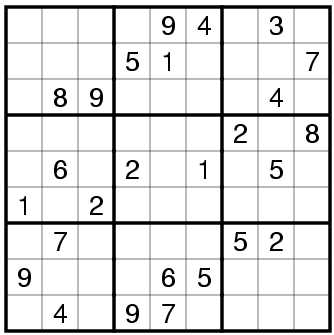

In [45]:

 # 9x9 matrix of integer variables
X = [ [ Int("x_%s_%s" % (i+1, j+1)) for j in range(9) ]
      for i in range(9) ]

# each cell contains a value in {1, ..., 9}
cells_c  = [ And(1 <= X[i][j], X[i][j] <= 9)
             for i in range(9) for j in range(9) ]

# each row contains a digit at most once
rows_c   = [ Distinct(X[i]) for i in range(9) ]

# each column contains a digit at most once
cols_c   = [ Distinct([ X[i][j] for i in range(9) ])
             for j in range(9) ]

# each 3x3 square contains a digit at most once
sq_c     = [ Distinct([ X[3*i0 + i][3*j0 + j]
                        for i in range(3) for j in range(3) ])
             for i0 in range(3) for j0 in range(3) ]

sudoku_c = cells_c + rows_c + cols_c + sq_c

# sudoku instance, we use '0' for empty cells
instance = ((0,0,0,0,9,4,0,3,0),
            (0,0,0,5,1,0,0,0,7),
            (0,8,9,0,0,0,0,4,0),
            (0,0,0,0,0,0,2,0,8),
            (0,6,0,2,0,1,0,5,0),
            (1,0,2,0,0,0,0,0,0),
            (0,7,0,0,0,0,5,2,0),
            (9,0,0,0,6,5,0,0,0),
            (0,4,0,9,7,0,0,0,0))

instance_c = [ If(instance[i][j] == 0,
                  True,
                  X[i][j] == instance[i][j])
               for i in range(9) for j in range(9) ]

s = Solver()
s.add(sudoku_c + instance_c)
if s.check() == sat:
    m = s.model()
    r = [ [ m.evaluate(X[i][j]) for j in range(9) ]
          for i in range(9) ]
    print_matrix(r)
else:
    print("failed to solve")
    

# Let us remove 9 from the first row and see if there is more than one solution

instance = ((0,0,0,0,0,4,0,3,0),
            (0,0,0,5,1,0,0,0,7),
            (0,8,9,0,0,0,0,4,0),
            (0,0,0,0,0,0,2,0,8),
            (0,6,0,2,0,1,0,5,0),
            (1,0,2,0,0,0,0,0,0),
            (0,7,0,0,0,0,5,2,0),
            (9,0,0,0,6,5,0,0,0),
            (0,4,0,9,7,0,0,0,0))

instance_c = [ If(instance[i][j] == 0,
                  True,
                  X[i][j] == instance[i][j])
               for i in range(9) for j in range(9) ]    
    
def n_solutions(n):
    s = Solver()
    s.add(sudoku_c + instance_c)
    i = 0
    while s.check() == sat and i < n:
        m = s.model()
        print([[ m.evaluate(X[i][j]) for j in range(9)] for i in range(9)])
        fml = And([X[i][j] == m.evaluate(X[i][j]) for i in range(9) for j in range(9)])
        s.add(Not(fml))
        i += 1
        
n_solutions(10)

[[7, 1, 5, 8, 9, 4, 6, 3, 2],
 [2, 3, 4, 5, 1, 6, 8, 9, 7],
 [6, 8, 9, 7, 2, 3, 1, 4, 5],
 [4, 9, 3, 6, 5, 7, 2, 1, 8],
 [8, 6, 7, 2, 3, 1, 9, 5, 4],
 [1, 5, 2, 4, 8, 9, 7, 6, 3],
 [3, 7, 6, 1, 4, 8, 5, 2, 9],
 [9, 2, 8, 3, 6, 5, 4, 7, 1],
 [5, 4, 1, 9, 7, 2, 3, 8, 6]]
[[5, 1, 7, 6, 8, 4, 9, 3, 2], [2, 3, 4, 5, 1, 9, 8, 6, 7], [6, 8, 9, 3, 2, 7, 1, 4, 5], [7, 9, 3, 4, 5, 6, 2, 1, 8], [4, 6, 8, 2, 9, 1, 7, 5, 3], [1, 5, 2, 7, 3, 8, 4, 9, 6], [8, 7, 6, 1, 4, 3, 5, 2, 9], [9, 2, 1, 8, 6, 5, 3, 7, 4], [3, 4, 5, 9, 7, 2, 6, 8, 1]]
[[7, 1, 5, 8, 9, 4, 6, 3, 2], [2, 3, 4, 5, 1, 6, 8, 9, 7], [6, 8, 9, 7, 2, 3, 1, 4, 5], [4, 9, 3, 6, 5, 7, 2, 1, 8], [8, 6, 7, 2, 3, 1, 9, 5, 4], [1, 5, 2, 4, 8, 9, 7, 6, 3], [3, 7, 6, 1, 4, 8, 5, 2, 9], [9, 2, 8, 3, 6, 5, 4, 7, 1], [5, 4, 1, 9, 7, 2, 3, 8, 6]]
[[5, 1, 6, 7, 8, 4, 9, 3, 2], [2, 3, 4, 5, 1, 9, 8, 6, 7], [7, 8, 9, 3, 2, 6, 1, 4, 5], [4, 9, 3, 6, 5, 7, 2, 1, 8], [8, 6, 7, 2, 9, 1, 3, 5, 4], [1, 5, 2, 8, 4, 3, 7, 9, 6], [6, 7, 1, 4, 3, 8, 5, 2, 9], [9

# The end

感谢聆听!